## 
https://kibua20.tistory.com/214

In [1]:
import numpy as np
import pandas as pd

# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = np.array([[1,4],[2,2],[2,5],[3,3],[3,4],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
print ('Input data:')
print (df)

Input data:
[[1 4]
 [2 2]
 [2 5]
 [3 3]
 [3 4]
 [4 7]
 [5 6]
 [6 4]
 [6 7]
 [7 6]
 [7 9]
 [8 7]
 [8 9]
 [9 4]
 [9 8]]


In [3]:
pd.DataFrame(df)

,0,1
0,1,4
1,2,2
2,2,5
3,3,3
4,3,4
5,4,7
6,5,6
7,6,4
8,6,7
9,7,6


In [4]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10)
y_pred = kmeans.fit_predict(df)

clusters:
[0 0 0 0 0 2 2 2 2 2 1 1 1 2 1]
kmeans.inertia: 36.91666666666667
kmeans.labels: [0 0 0 0 0 2 2 2 2 2 1 1 1 2 1]
kmeans.algorithm: auto
For n_clusters = 3 The average silhouette_score is : 0.4153407670307898
sample_silhouette_values:
 [0.65074033 0.6185424  0.5478873  0.61705197 0.57919343 0.18887114
 0.39498669 0.28747698 0.05572809 0.10496279 0.52273767 0.34845742
 0.64952186 0.07634037 0.58761307]


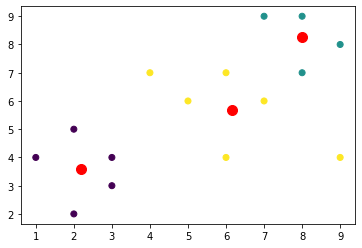

In [5]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
silhouette_avg = silhouette_score(df, y_pred)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, y_pred)

print ('clusters:')
print (y_pred)

print ('kmeans.inertia:',kmeans.inertia_)
print ('kmeans.labels:',kmeans.labels_)
print ('kmeans.algorithm:',kmeans.algorithm)

# select # of cluster
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
print ('sample_silhouette_values:\n', sample_silhouette_values)

# plot
plt.scatter(df[:,0], df[:,1])
plt.savefig('05_kmeans_original.png')
plt.clf()

plt.scatter(df[:,0], df[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.savefig('05_kmeans_centers.png')

##
https://machinelearningmastery.com/clustering-algorithms-with-python/

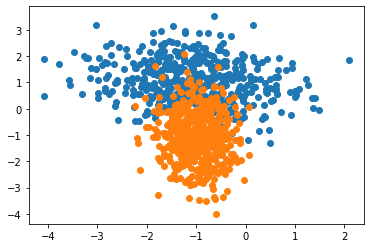

In [6]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [7]:
X.shape

(1000, 2)

In [8]:
# model = KMeans(n_clusters=2)
# # fit the model
# model.fit(X)
# # assign a cluster to each example
# yhat = model.predict(X)
# # retrieve unique clusters
# clusters = unique(yhat)
# # create scatter plot for samples from each cluster
# for cluster in clusters:
# 	# get row indexes for samples with this cluster
# 	row_ix = where(yhat == cluster)
# 	# create scatter of these samples
# 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# # show the plot
# pyplot.show()

## 
https://kenzotakahashi.github.io/k-means-clustering-from-scratch-in-python.html

In [9]:
import numpy as np

In [10]:
class KMeans(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]
        return self

## 
https://www.jcchouinard.com/kmeans/

In [11]:
from sklearn.datasets import make_blobs
# create a dataset of 200 samples
# and 5 clusters
features, labels = make_blobs(
    n_samples=200,
    centers=5
)

In [12]:
features.shape

(200, 2)

In [13]:
from sklearn.cluster import KMeans
# Instanciate the model with 5 'K' clusters
# and 10 iterations with different
# centroid seed 
model = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(features)
 
# make a prediction on the data
p_labels = model.predict(features)

In [14]:
p_labels

array([2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 3, 0, 0, 0, 1, 1, 0, 2, 2, 1, 3, 2,
       0, 3, 2, 3, 3, 0, 4, 3, 4, 3, 0, 3, 3, 0, 3, 0, 4, 4, 3, 1, 2, 2,
       2, 2, 2, 1, 2, 3, 0, 4, 2, 0, 3, 2, 0, 4, 3, 1, 3, 4, 1, 2, 2, 3,
       4, 4, 3, 4, 0, 1, 1, 0, 3, 1, 1, 4, 4, 0, 3, 4, 3, 4, 4, 4, 1, 3,
       1, 0, 3, 3, 1, 4, 0, 4, 1, 2, 0, 2, 4, 3, 1, 2, 1, 4, 2, 0, 0, 4,
       0, 4, 0, 2, 3, 3, 1, 1, 3, 2, 2, 0, 2, 2, 4, 4, 0, 4, 3, 4, 4, 3,
       3, 2, 0, 0, 0, 4, 4, 1, 1, 0, 4, 2, 3, 1, 1, 4, 0, 1, 4, 3, 0, 4,
       0, 1, 2, 0, 3, 0, 4, 4, 1, 4, 3, 3, 2, 3, 1, 1, 2, 1, 4, 2, 0, 1,
       2, 3, 2, 2, 4, 0, 0, 1, 2, 3, 4, 2, 3, 2, 2, 1, 1, 4, 1, 1, 3, 1,
       0, 0])

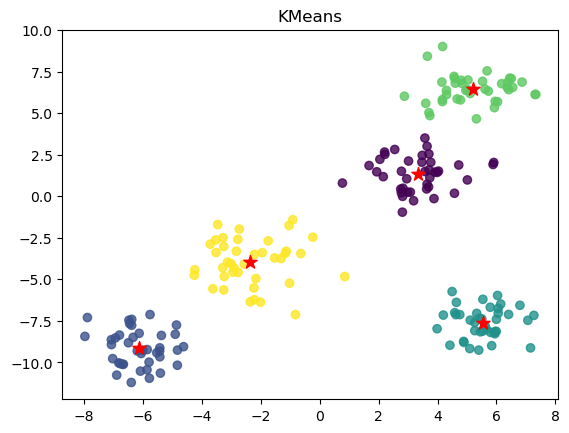

In [15]:
import matplotlib.pyplot as plt
plt.style.use('default')
 
X = features[:,0]
y = features[:,1]
 
plt.scatter(X, y, c=p_labels, alpha=0.8)
 
cluster_centers = model.cluster_centers_
cs_x = cluster_centers[:,0]
cs_y = cluster_centers[:,1]
 
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r')
plt.title('KMeans')
plt.show()

C:\Users\sjkim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


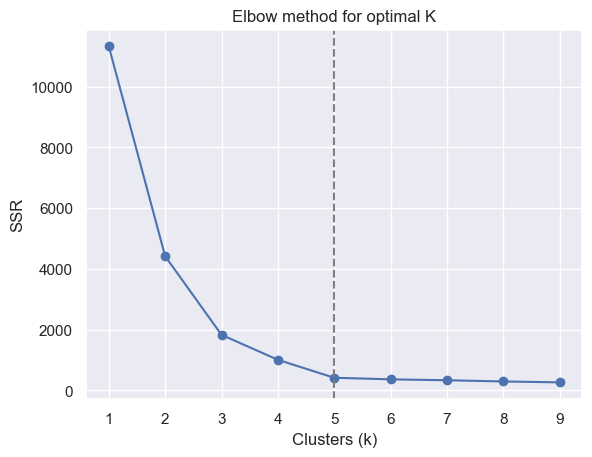

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
ks = range(1, 10)
 
ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)
 
    # fit the model
    model.fit(features)
 
    # append the inertial to a list
    ssr.append(model.inertia_)
     
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()

## 
code applied to dataset with 3 features.

In [17]:
import pandas as pd
socar = pd.read_csv("../data/data_final/2402_1229_data_collected.csv")
socar = socar.set_index('Unnamed: 0')
#socar.drop(columns=['Unnamed: 0'],inplace=True)
socar

,녹지,주거,공업,상업,인구,socar_zone_counts
Unnamed: 0,,,,,,
수원시 장안구,0.272727,0.727273,0.000000,0.000000,271012,18
수원시 권선구,0.625000,0.312500,0.062500,0.000000,367004,16
수원시 팔달구,0.136364,0.409091,0.000000,0.454545,192225,20
수원시 영통구,0.142857,0.571429,0.285714,0.000000,360127,34
용인시 처인구,0.823529,0.058824,0.000000,0.117647,259872,29
용인시 기흥구,0.727273,0.181818,0.090909,0.000000,438500,37
용인시 수지구,0.428571,0.571429,0.000000,0.000000,377198,37
성남시 수정구,0.631579,0.368421,0.000000,0.000000,232125,18
성남시 중원구,0.555556,0.222222,0.111111,0.111111,206211,13


In [18]:
socar.shape

(42, 6)

In [28]:
model = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(socar)

# make a prediction on the data
p_labels = model.predict(socar)

In [29]:
clusters = pd.DataFrame(index=socar.index,data=p_labels)
clusters

,0
Unnamed: 0,
수원시 장안구,2
수원시 권선구,4
수원시 팔달구,2
수원시 영통구,4
용인시 처인구,2
용인시 기흥구,1
용인시 수지구,4
성남시 수정구,2
성남시 중원구,2


In [21]:
print(0, clusters.index[clusters[0] == 0].tolist())
print(1, clusters.index[clusters[0] == 1].tolist())
print(2, clusters.index[clusters[0] == 2].tolist())
print(3, clusters.index[clusters[0] == 3].tolist())
print(4, clusters.index[clusters[0] == 4].tolist())

0 ['의왕시', '양평군', '여주시', '과천시', '포천시', '동두천시', '가평군', '연천군']
1 ['용인시 기흥구', '성남시 분당구', '평택시', '시흥시', '김포시', '고양시 덕양구', '파주시', '의정부시']
2 ['수원시 장안구', '수원시 팔달구', '용인시 처인구', '성남시 수정구', '성남시 중원구', '안양시 만안구', '군포시', '오산시', '이천시', '안성시', '양주시', '구리시']
3 ['부천시', '화성시', '남양주시']
4 ['수원시 권선구', '수원시 영통구', '용인시 수지구', '안산시 단원구', '안산시 상록구', '안양시 동안구', '광주시', '광명시', '하남시', '고양시 일산동구', '고양시 일산서구']


In [22]:
socar.index

Index(['수원시 장안구', '수원시 권선구', '수원시 팔달구', '수원시 영통구', '용인시 처인구', '용인시 기흥구',
       '용인시 수지구', '성남시 수정구', '성남시 중원구', '성남시 분당구', '부천시', '화성시', '안산시 단원구',
       '안산시 상록구', '안양시 동안구', '안양시 만안구', '평택시', '시흥시', '김포시', '광주시', '광명시',
       '군포시', '하남시', '오산시', '이천시', '안성시', '의왕시', '양평군', '여주시', '과천시',
       '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '남양주시', '파주시', '의정부시', '양주시', '구리시',
       '포천시', '동두천시', '가평군', '연천군'],
      dtype='object', name='Unnamed: 0')

In [23]:
p_labels

array([2, 4, 2, 4, 2, 1, 4, 2, 2, 1, 3, 3, 4, 4, 4, 2, 1, 1, 1, 4, 4, 2,
       4, 2, 2, 2, 0, 0, 0, 0, 1, 4, 4, 3, 1, 1, 2, 2, 0, 0, 0, 0])